In [1]:
import json

class MockAIGame:
    observations = []
    rewards = []
    env = None

    def __init__(self, env):
        self.env = env
    
config = None
with open('../config.json') as f:
    config = json.load(f)


In [2]:
import gym
env = gym.make('CartPole-v1')

In [3]:
from neurosim.game_interface import GameInterface

game = MockAIGame(env)
gi = GameInterface(game, config)


In [4]:
import time

from neurosim.conf import read_conf
from neurosim.critic import Critic

dconf = read_conf('../config.json')
critic = Critic(dconf)


steps = []
observations = []
firing_rates = []

for i_episode in range(3):
    observation = env.reset()
    print(observation)
    for t in range(20):
        env.render()
#         print(observation)
        observations.append(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        rrr = critic.calc_reward(observation, observations[-1])
        
        game.observations = [observation]
        firing_rates.append(gi.input_firing_rates())
        firing_indices = (firing_rates[-1] > 0).nonzero()
        
        print('R' if action else 'L', [round(k, 3) for k in observation], rrr)
        
        if done:
            observations.append(observation)
            steps.append(t+1)
#             print("Episode finished after {} timesteps".format(t+1))
            break
        time.sleep(4)

env.close()


[-0.04131487  0.00957576  0.00387079  0.04683643]
R [-0.041, 0.205, 0.005, -0.245] -0.8024864536223608
L [-0.037, 0.009, -0.0, 0.05] 2.0
R [-0.037, 0.205, 0.001, -0.243] -0.7961231036121266
L [-0.033, 0.009, -0.004, 0.05] 2.0
R [-0.033, 0.205, -0.003, -0.244] -0.7896716565918929
R [-0.028, 0.4, -0.008, -0.538] -0.5461940439791847
R [-0.02, 0.595, -0.019, -0.833] -0.3552942504049855
L [-0.009, 0.4, -0.035, -0.546] 0.9961144761291059
L [-0.001, 0.206, -0.046, -0.265] 1.6872237842354167
R [0.004, 0.401, -0.051, -0.572] -0.49132751337997355
L [0.012, 0.207, -0.063, -0.296] 1.3364375396754435
L [0.016, 0.013, -0.069, -0.023] 1.2556855027751574
R [0.016, 0.209, -0.069, -0.337] -0.45544836157175067
L [0.02, 0.015, -0.076, -0.067] 1.2213737068277892
R [0.02, 0.211, -0.077, -0.383] -0.45048170349891026
R [0.025, 0.407, -0.085, -0.699] -0.39337636922610975
R [0.033, 0.603, -0.099, -1.017] -0.2964120036775932
L [0.045, 0.409, -0.119, -0.757] 0.516285154004975
L [0.053, 0.216, -0.134, -0.504] 0.56

lin_space_fixed [-0.2 -0.1  0.   0.1  0.2]
lin_space [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]


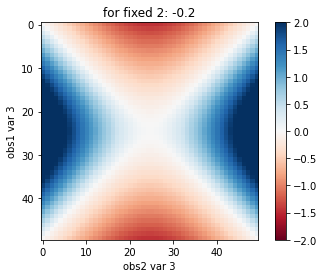

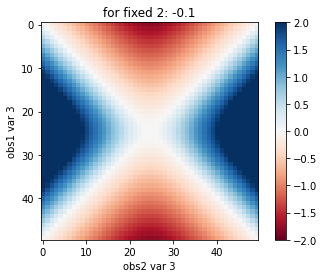

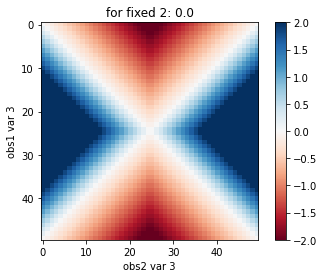

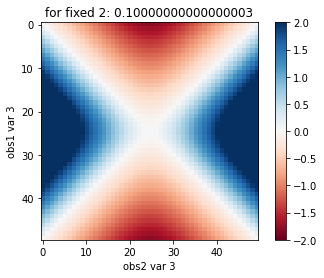

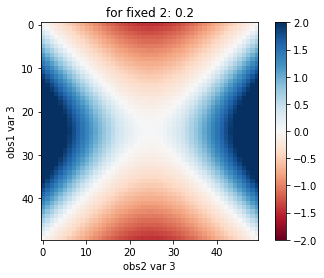






lin_space_fixed [-1.  -0.5  0.   0.5  1. ]
lin_space [-0.2        -0.19183673 -0.18367347 -0.1755102  -0.16734694 -0.15918367
 -0.15102041 -0.14285714 -0.13469388 -0.12653061 -0.11836735 -0.11020408
 -0.10204082 -0.09387755 -0.08571429 -0.07755102 -0.06938776 -0.06122449
 -0.05306122 -0.04489796 -0.03673469 -0.02857143 -0.02040816 -0.0122449
 -0.00408163  0.00408163  0.0122449   0.02040816  0.02857143  0.03673469
  0.04489796  0.05306122  0.06122449  0.06938776  0.07755102  0.08571429
  0.09387755  0.10204082  0.11020408  0.11836735  0.12653061  0.13469388
  0.14285714  0.15102041  0.15918367  0.16734694  0.1755102   0.18367347
  0.19183673  0.2       ]


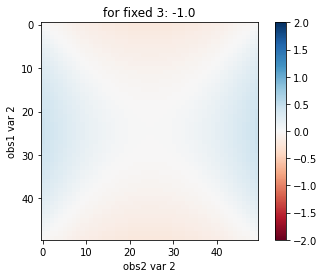

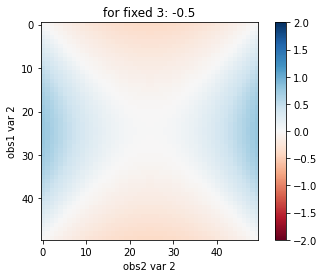

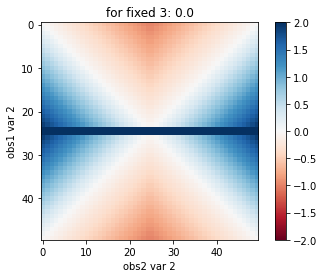

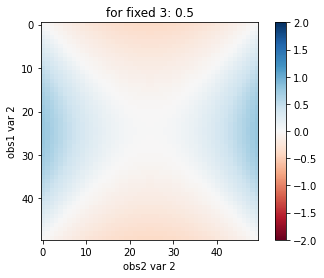

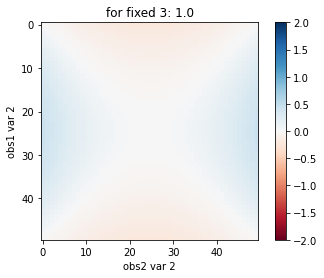

In [3]:
import time

# min_values = [-0.530120, -2.154456, -0.209409, -2.590083]
# max_values = [0.610815, 1.796593, 0.209186, 2.664974]

min_values = [-0.530120, -2.154456, -0.2, -1.0]
max_values = [0.610815, 1.796593, 0.2, 1.0]

from neurosim.conf import read_conf
from neurosim.critic import Critic

dconf = read_conf('../config.json')
del dconf['critic']['modulation']
critic = Critic(dconf)


import numpy as np
import matplotlib.pyplot as plt
STEPS = 50


for var_fixed, var_idx in [[2,3], [3,2]]:

    # var_fixed = 2
    lin_space_fixed = np.linspace(min_values[var_fixed], max_values[var_fixed], 5)

    print('lin_space_fixed', lin_space_fixed)
    
    lin_space = np.linspace(min_values[var_idx], max_values[var_idx], STEPS)

    print('lin_space', lin_space)

    for i_fixed, v_fixed in enumerate(lin_space_fixed):

    #     var_idx = 3

        M = np.zeros((STEPS, STEPS), np.float32)

        obs1 = np.zeros(4)
        obs2 = np.zeros(4)

        obs1[var_fixed] = v_fixed
        obs2[var_fixed] = v_fixed


        for i1, var1 in enumerate(lin_space):
            obs1[var_idx] = var1
            for i2, var2 in enumerate(lin_space):
                obs2[var_idx] = var2

                rrr = critic.calc_reward(obs1, obs2)
        #         print(obs1, obs2, rrr)
                M[i1][i2] = rrr

        plt.figure()

        plt.title('for fixed {}: {}'.format(var_fixed, v_fixed))
        plt.imshow(M, vmin=-2, vmax=2, cmap='RdBu')
        plt.colorbar()
        plt.xlabel('obs2 var {}'.format(var_idx))
        plt.ylabel('obs1 var {}'.format(var_idx))

        plt.show()
        
    print('\n\n\n\n')
    
#     lin_space [-2.590083   -1.71424017 -0.83839733  0.0374455   0.91328833  1.78913117
#   2.664974  ]

In [12]:
M < 0

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False, False],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, Fals